In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sys
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
data=pd.read_csv("/content/cl_data_is (2).csv")
data.head()

,Unnamed: 0,age,sex,bmi,children,smoker,charges,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,NumberOfMajorSurgeries
0,0,19.0,female,27.900,0,yes,16884.92400,0,0,0,0,0,0
1,1,18.0,male,33.770,1,no,1725.55230,0,0,0,0,0,0
2,2,28.0,male,33.000,3,no,4449.46200,0,0,0,0,0,0
3,3,33.0,male,22.705,0,no,21984.47061,0,0,0,0,0,0
4,4,32.0,male,28.880,0,no,3866.85520,0,0,0,0,0,0


In [7]:
# Check the column names
print("Original columns:", data.columns)

# Drop the 'Unnamed' column
if 'Unnamed: 0' in data.columns:
    data.drop(columns=['Unnamed: 0'], inplace=True)

# Check the column names after dropping
print("Columns after dropping 'Unnamed':", data.columns)
data.head()

Original columns: Index(['Unnamed: 0', 'age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'NumberOfMajorSurgeries'],
      dtype='object')
Columns after dropping 'Unnamed': Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'Diabetes',
       'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
       'KnownAllergies', 'NumberOfMajorSurgeries'],
      dtype='object')


,age,sex,bmi,children,smoker,charges,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,NumberOfMajorSurgeries
0,19.0,female,27.900,0,yes,16884.92400,0,0,0,0,0,0
1,18.0,male,33.770,1,no,1725.55230,0,0,0,0,0,0
2,28.0,male,33.000,3,no,4449.46200,0,0,0,0,0,0
3,33.0,male,22.705,0,no,21984.47061,0,0,0,0,0,0
4,32.0,male,28.880,0,no,3866.85520,0,0,0,0,0,0


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data.sex=le.fit_transform(data.sex)
data.smoker=le.fit_transform(data.smoker)

In [9]:
features,target=data.drop(["charges"],axis='columns'),data["charges"]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
model.score(x_train,y_train)

0.7245911073524549

In [13]:
pred=model.predict(x_train)
pred_actual=pd.DataFrame({"Pred":pred,"Actual":y_train})
pred_actual.head()

,Pred,Actual
314,28578.471271,34838.87300
217,4750.814352,2483.73600
123,34284.040424,39556.49450
2209,12284.240130,13270.42227
2067,14233.704444,13270.42227


In [14]:
error=y_train-pred
np.mean(error)

-4.0000154285613025e-12

(array([ 92., 152., 687., 736.,  96.,  47.,  22.,  16.,  10.,   1.]),
 array([-12335.81761366,  -8273.26428836,  -4210.71096305,   -148.15763775,
          3914.39568756,   7976.94901286,  12039.50233816,  16102.05566347,
         20164.60898877,  24227.16231407,  28289.71563938]),
 <BarContainer object of 10 artists>)

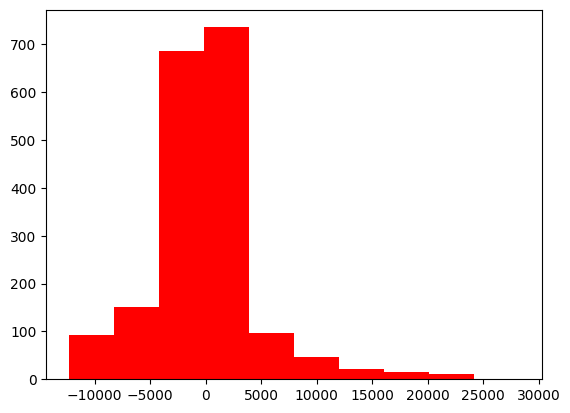

In [15]:
plt.hist(error,color='r')

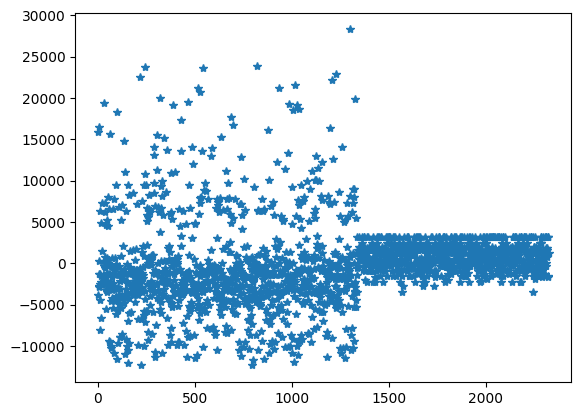

In [16]:
plt.plot(error,"*")

<Axes: xlabel='Actual', ylabel='Pred'>

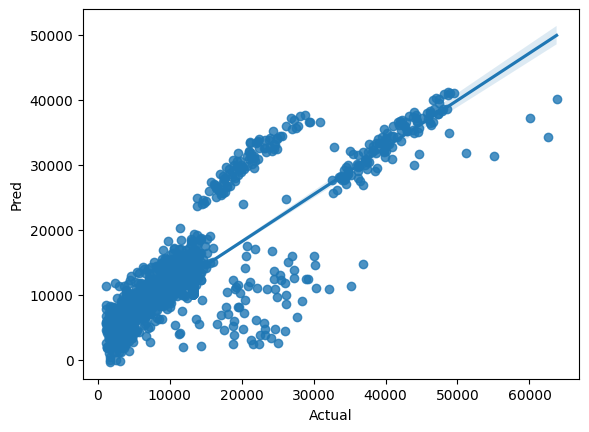

In [17]:
sns.regplot(x=pred_actual.Actual,y=pred_actual.Pred)

In [18]:
x=np.array(pred_actual)

In [19]:
from sklearn.covariance import EllipticEnvelope
elpenv=EllipticEnvelope(contamination=0.05)
pred=elpenv.fit_predict(x)
pred

array([ 1,  1, -1, ...,  1,  1,  1])

In [20]:
  l1=list(pred)
  l1.count(-1) #count of outliers

93

In [21]:
index_for_outlier=np.where(pred==-1)
print("Outlier indexes are: ",index_for_outlier)
print()

Outlier indexes are:  (array([   2,    7,   70,   96,  102,  106,  109,  131,  157,  213,  223,
        225,  231,  239,  257,  262,  315,  320,  357,  386,  409,  416,
        422,  501,  510,  533,  553,  575,  582,  595,  599,  613,  630,
        637,  649,  652,  665,  694,  728,  747,  756,  760,  770,  787,
        795,  803,  805,  821,  851,  856,  868,  872,  873,  885,  908,
        911, 1002, 1044, 1052, 1075, 1114, 1140, 1147, 1156, 1160, 1247,
       1269, 1270, 1275, 1299, 1309, 1328, 1329, 1345, 1355, 1357, 1411,
       1442, 1472, 1497, 1568, 1591, 1595, 1620, 1629, 1638, 1644, 1652,
       1670, 1699, 1710, 1733, 1796]),)



In [22]:
outlier_values=x[index_for_outlier]
outlier_values

array([[34284.04042403, 39556.4945    ],
       [33358.75002498, 39047.285     ],
       [36081.71683864, 41919.097     ],
       [35996.17629447, 42760.5022    ],
       [33233.62383213, 37742.5757    ],
       [33402.10113433, 38709.176     ],
       [31317.69447241, 55135.40209   ],
       [33238.87475275, 39611.7577    ],
       [30716.64416541, 37079.372     ],
       [33150.61974447, 40182.246     ],
       [35579.1022011 , 44641.1974    ],
       [29513.42562262, 38792.6856    ],
       [33175.42555518, 40419.0191    ],
       [30922.22711368, 37270.1512    ],
       [40142.5596459 , 63770.42801   ],
       [36534.79213033, 41676.0811    ],
       [39422.34235893, 47496.49445   ],
       [38208.75040148, 46130.5265    ],
       [34268.35536729, 41661.602     ],
       [29935.75363934, 43943.8761    ],
       [34303.15745062, 62592.87309   ],
       [37433.85392339, 43254.41795   ],
       [40973.69354252, 48970.2476    ],
       [37963.87736299, 45702.02235   ],
       [40046.11

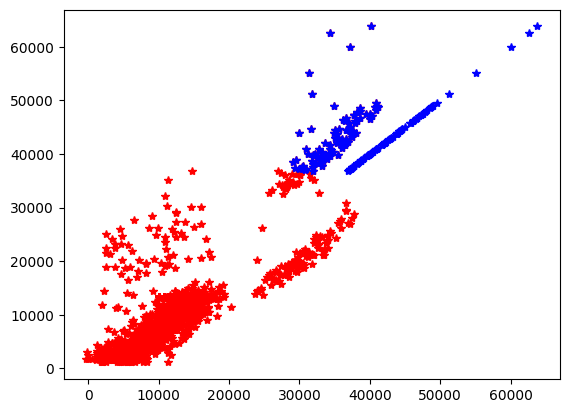

In [23]:
plt.plot(x[:,0],x[:,1],"*",color="r")
plt.plot(outlier_values,outlier_values[:,1],"*",color="b")